


**PORTFOLIO OPTIMISATION USING STATISTICAL MODELLING**

In [ ]:
# Load Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Install yfinance and matplotlib package
!pip install yfinance
!pip install matplotlib
# Import yfinance and matplotlib
import yfinance as yf  
import matplotlib.pyplot as plt
# Get the data for the SPY ETF by specifying the stock ticker, start date, and end date
stocks= ['TCS.BO', 'INFY.BO', 'SUNPHARMA.BO', 'DRREDDY.BO', 'HINDUNILVR.BO', 'ITC.BO', 
         'HDFCBANK.BO', 'AXISBANK.BO']
data = yf.download(stocks,'2019-01-01','2021-08-06')


     |████████████████████████████████| 6.3 MB 32.0 MB/s 
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
[*********************100%***********************]  8 of 8 completed


In [ ]:
df = data["Adj Close"]
df.head()

,AXISBANK.BO,DRREDDY.BO,HDFCBANK.BO,HINDUNILVR.BO,INFY.BO,ITC.BO,SUNPHARMA.BO,TCS.BO
Date,,,,,,,,
2019-01-01,626.721741,2550.863281,1060.137085,1726.792847,609.725037,250.846985,421.600616,1787.699219
2019-01-02,618.132446,2540.897705,1049.523071,1708.501099,613.990784,248.762848,428.609467,1807.245605
2019-01-03,607.195984,2516.422607,1042.759888,1711.709351,612.385315,247.343857,423.790863,1782.154663
2019-01-04,619.081177,2541.923584,1045.474976,1704.909790,606.147278,248.984558,421.308563,1761.010864
2019-01-07,636.659424,2497.858887,1046.585815,1709.171509,615.687927,249.871414,418.631561,1782.343018


In [ ]:
# Log of percentage change
cov_matrix = df.pct_change().apply(lambda x: np.log(1+x)).cov()
cov_matrix

,AXISBANK.BO,DRREDDY.BO,HDFCBANK.BO,HINDUNILVR.BO,INFY.BO,ITC.BO,SUNPHARMA.BO,TCS.BO
AXISBANK.BO,0.000867,0.000114,0.000350,0.000165,0.000199,0.000225,0.000185,0.000171
DRREDDY.BO,0.000114,0.000345,0.000050,0.000114,0.000100,0.000050,0.000176,0.000075
HDFCBANK.BO,0.000350,0.000050,0.000394,0.000103,0.000137,0.000141,0.000106,0.000108
HINDUNILVR.BO,0.000165,0.000114,0.000103,0.000268,0.000110,0.000081,0.000089,0.000098
INFY.BO,0.000199,0.000100,0.000137,0.000110,0.000411,0.000087,0.000108,0.000220
ITC.BO,0.000225,0.000050,0.000141,0.000081,0.000087,0.000364,0.000116,0.000090
SUNPHARMA.BO,0.000185,0.000176,0.000106,0.000089,0.000108,0.000116,0.000462,0.000090
TCS.BO,0.000171,0.000075,0.000108,0.000098,0.000220,0.000090,0.000090,0.000312


In [ ]:
corr_matrix = df.pct_change().apply(lambda x: np.log(1+x)).corr()
corr_matrix

,AXISBANK.BO,DRREDDY.BO,HDFCBANK.BO,HINDUNILVR.BO,INFY.BO,ITC.BO,SUNPHARMA.BO,TCS.BO
AXISBANK.BO,1.000000,0.209305,0.598036,0.341624,0.333138,0.400088,0.292839,0.329006
DRREDDY.BO,0.209305,1.000000,0.135705,0.376894,0.266041,0.140874,0.442188,0.228236
HDFCBANK.BO,0.598036,0.135705,1.000000,0.317251,0.340563,0.372058,0.248750,0.308245
HINDUNILVR.BO,0.341624,0.376894,0.317251,1.000000,0.331855,0.260504,0.252602,0.339739
INFY.BO,0.333138,0.266041,0.340563,0.331855,1.000000,0.223921,0.247056,0.613556
ITC.BO,0.400088,0.140874,0.372058,0.260504,0.223921,1.000000,0.282523,0.267038
SUNPHARMA.BO,0.292839,0.442188,0.248750,0.252602,0.247056,0.282523,1.000000,0.236510
TCS.BO,0.329006,0.228236,0.308245,0.339739,0.613556,0.267038,0.236510,1.000000


In [ ]:
# Randomly weighted portfolio's variance
w = {'TCS.BO' : 0.15, 'INFY.BO' : 0.2, 'SUNPHARMA.BO' : 0.1, 'DRREDDY.BO': 0.1, 'HINDUNILVR.BO' : 0.1,
     'ITC.BO': 0.1, 'HDFC.BO': 0.15, 'AXISBANK.BO' : 0.2}
port_var = cov_matrix.mul(w, axis=0).mul(w, axis=1).sum().sum()
port_var

0.00017872790634790943

In [ ]:
# Yearly returns for individual companies
ind_er = df.resample('Y').last().pct_change().mean()
ind_er

AXISBANK.BO      0.015185
DRREDDY.BO       0.374015
HDFCBANK.BO      0.084105
HINDUNILVR.BO    0.129571
INFY.BO          0.545100
ITC.BO           0.003929
SUNPHARMA.BO     0.360186
TCS.BO           0.254170
dtype: float64

In [ ]:
# Portfolio returns
w = [0.15, 0.2,0.1,0.1,0.1,0.1,0.15, 0.2]
port_er = (w*ind_er).sum()
port_er

0.25821306079239376

In [ ]:
# Volatility is given by the annual standard deviation. 
# We multiply by 250 because there are 250 trading days/year.
ann_sd = df.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250))
ann_sd

AXISBANK.BO      0.465467
DRREDDY.BO       0.293600
HDFCBANK.BO      0.313947
HINDUNILVR.BO    0.258654
INFY.BO          0.320596
ITC.BO           0.301562
SUNPHARMA.BO     0.339793
TCS.BO           0.279339
dtype: float64

In [ ]:
assets = pd.concat([ind_er, ann_sd], axis=1) 
# Creating a table for visualising returns and volatility of assets
assets.columns = ['Returns', 'Volatility']
assets

,Returns,Volatility
AXISBANK.BO,0.015185,0.465467
DRREDDY.BO,0.374015,0.293600
HDFCBANK.BO,0.084105,0.313947
HINDUNILVR.BO,0.129571,0.258654
INFY.BO,0.545100,0.320596
ITC.BO,0.003929,0.301562
SUNPHARMA.BO,0.360186,0.339793
TCS.BO,0.254170,0.279339


MONTE CARLO SIMULATION

In [ ]:
p_ret = [] # Define an empty array for portfolio returns
p_vol = [] # Define an empty array for portfolio volatility
p_weights = [] # Define an empty array for asset weights

num_assets = len(df.columns)
num_portfolios = 10000

In [ ]:
for portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    p_weights.append(weights)
    returns = np.dot(weights, ind_er) # Returns are the product of individual expected returns of asset and its 
                                      # weights 
    p_ret.append(returns)
    var = cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum()# Portfolio Variance
    sd = np.sqrt(var) # Daily standard deviation
    ann_sd = sd*np.sqrt(250) # Annual standard deviation = volatility
    p_vol.append(ann_sd)
    data = {'Returns':p_ret, 'Volatility':p_vol}

for counter, symbol in enumerate(df.columns.tolist()):
    #print(counter, symbol)
    data[symbol+' weight'] = [w[counter] for w in p_weights]
    portfolios  = pd.DataFrame(data)
    
portfolios.head() # Dataframe of the 10000 portfolios created

,Returns,Volatility,AXISBANK.BO weight,DRREDDY.BO weight,HDFCBANK.BO weight,HINDUNILVR.BO weight,INFY.BO weight,ITC.BO weight,SUNPHARMA.BO weight,TCS.BO weight
0,0.271549,0.200704,0.032746,0.240414,0.251876,0.084581,0.173153,0.049685,0.111535,0.056010
1,0.248915,0.212881,0.158563,0.156647,0.118513,0.140527,0.133480,0.002667,0.126060,0.163543
2,0.216277,0.198569,0.082028,0.168984,0.178775,0.190190,0.058257,0.032811,0.064343,0.224611
3,0.217080,0.217902,0.160576,0.067172,0.174819,0.074424,0.136216,0.080651,0.120658,0.185485
4,0.252386,0.210001,0.088823,0.129993,0.152446,0.002037,0.070613,0.058633,0.228016,0.269438


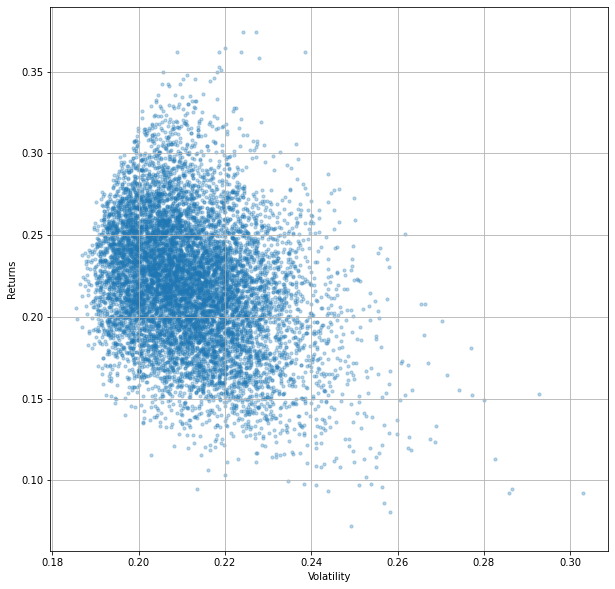

In [ ]:
# Plot efficient frontier
portfolios.plot.scatter(x='Volatility', y='Returns', marker='o', s=10, alpha=0.3, grid=True, figsize=[10,10])

In [ ]:
min_vol_port = portfolios.iloc[portfolios['Volatility'].idxmin()]
# idxmin() gives us the minimum value in the column specified.                               
min_vol_port

Returns                 0.205152
Volatility              0.185438
AXISBANK.BO weight      0.001468
DRREDDY.BO weight       0.192090
HDFCBANK.BO weight      0.109674
HINDUNILVR.BO weight    0.216039
INFY.BO weight          0.069890
ITC.BO weight           0.209716
SUNPHARMA.BO weight     0.056861
TCS.BO weight           0.144263
Name: 6060, dtype: float64

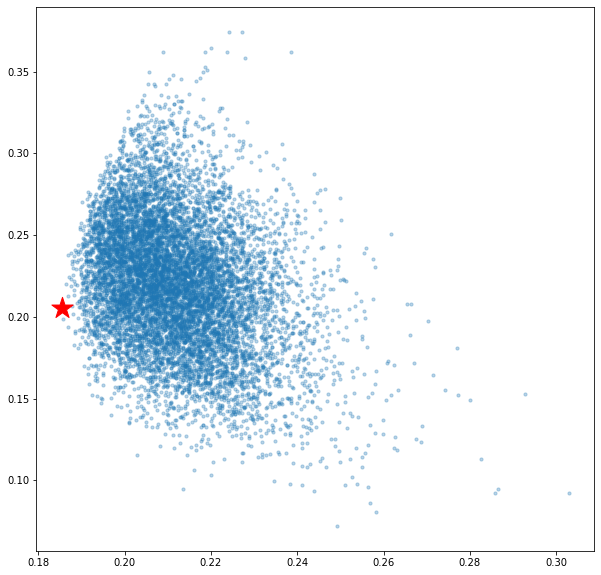

In [ ]:
# plotting the minimum volatility portfolio
plt.subplots(figsize=[10,10])
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)

In [ ]:
# Finding the optimal portfolio
rf = 0.01 # risk factor
optimal_risky_port = portfolios.iloc[((portfolios['Returns']-rf)/portfolios['Volatility']).idxmax()]
optimal_risky_port

Returns                 0.361901
Volatility              0.208820
AXISBANK.BO weight      0.006728
DRREDDY.BO weight       0.248509
HDFCBANK.BO weight      0.009354
HINDUNILVR.BO weight    0.043023
INFY.BO weight          0.312283
ITC.BO weight           0.084885
SUNPHARMA.BO weight     0.159382
TCS.BO weight           0.135834
Name: 2713, dtype: float64

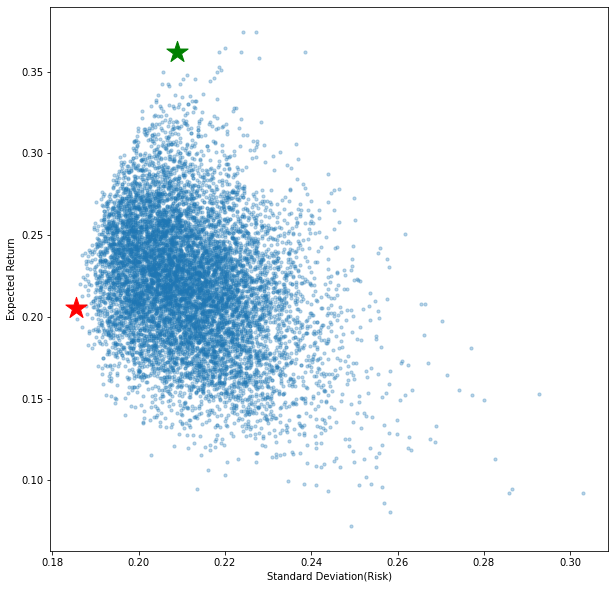

In [ ]:
# Plotting optimal portfolio
plt.subplots(figsize=(10, 10))
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], label = 'Minumim Volatility Portfolio', color='r', marker='*', s=500)
plt.xlabel('Standard Deviation(Risk)')
plt.ylabel('Expected Return')
plt.scatter(optimal_risky_port[1], optimal_risky_port[0], label = 'Optimal Risky Portfolio', color='g', marker='*', s=500)